In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
iris = datasets.load_iris()

In [3]:
# start with the first two features.
X = iris.data[:, :2]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [4]:
# train and test dataset split
# 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Perceptron Model

In [5]:
# Perceptron Model
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.66666666666666663

In [6]:
# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.66666666666666663

In [7]:
# 75/25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.63157894736842102

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                             resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='black')
       # highlight test samples
       if test_idx:
           # plot all samples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

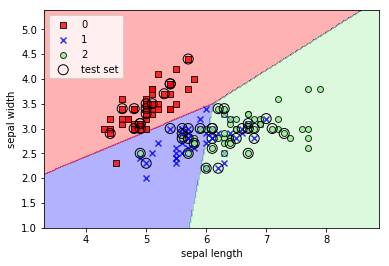

In [9]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined,y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()

In [10]:
# try with standardized data, and 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.66666666666666663

#### So it seems training model with different split and standardization are not helping increase the model accuracy.

In [11]:
# Using last two features

In [12]:
X = iris.data[:, 2:3]
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.48888888888888887

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.48888888888888887

In [15]:
# Using all features

In [16]:
X = iris.data[:, 0:3]
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.53333333333333333

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

0.53333333333333333

#### Also changing the features worsen the accuracy score.

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
X = iris.data[:, 0:3]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.97777777777777775

In [20]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.75555555555555554

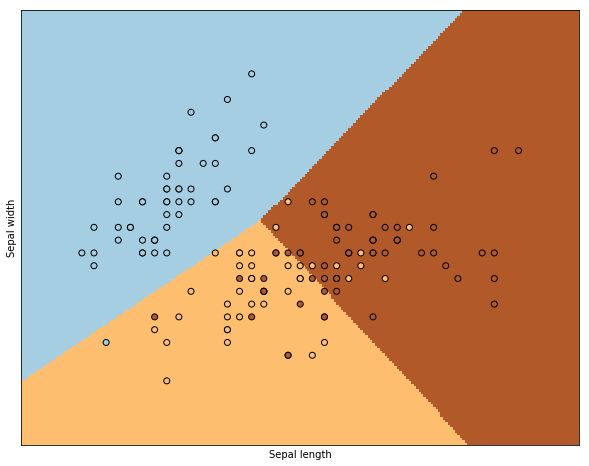

In [27]:
h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
lr.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Logistic regression has much better score.